In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ph-data.csv')

In [3]:
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 4 columns):
blue     653 non-null int64
green    653 non-null int64
red      653 non-null int64
label    653 non-null int64
dtypes: int64(4)
memory usage: 20.5 KB


In [5]:
df.describe()

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


In [6]:
# Mean label is 7.05 which shows that this the average pH is around 7 which is neutral.
# Min pH is 0 and max pH is 14.
# Thus data obtained is optimal for training our model.

In [7]:
%matplotlib inline

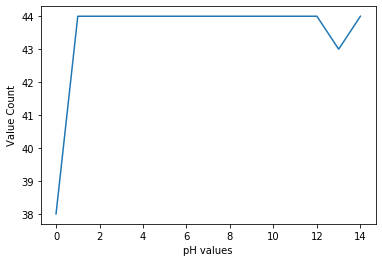

In [8]:
plt.plot(df['label'].value_counts().sort_index())
plt.xlabel('pH values')
plt.ylabel('Value Count')
plt.show()

In [9]:
df

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4
...,...,...,...,...
648,201,123,0,10
649,203,51,46,11
650,169,62,48,12
651,173,37,79,13


In [10]:
# Find duplicate values and NA in data

In [11]:
duplicate_rows = df[df.duplicated()]

In [12]:
null_rows = df[df.isna()]

In [13]:
df.loc[df['label'] < 7, 'Nature'] = 'Acidic'

In [14]:
df.loc[df['label'] == 7, 'Nature'] = 'Neutral'

In [15]:
df.loc[df['label'] > 7, 'Nature'] = 'Basic'

In [16]:
df['Nature'].value_counts()
# Nature Column gives info about the nature of the sample.

Basic      307
Acidic     302
Neutral     44
Name: Nature, dtype: int64

In [17]:
df_Nature = df.groupby('Nature')

In [18]:
df_Nature.head()

,blue,green,red,label,Nature
0,36,27,231,0,Acidic
1,36,84,250,1,Acidic
2,37,164,255,2,Acidic
3,22,205,255,3,Acidic
4,38,223,221,4,Acidic
7,13,156,0,7,Neutral
8,92,166,0,8,Basic
9,184,191,0,9,Basic
10,200,136,1,10,Basic
11,198,76,0,11,Basic


In [19]:
# Training our data

In [20]:
df.head()

,blue,green,red,label,Nature
0,36,27,231,0,Acidic
1,36,84,250,1,Acidic
2,37,164,255,2,Acidic
3,22,205,255,3,Acidic
4,38,223,221,4,Acidic


In [21]:
import seaborn as sns

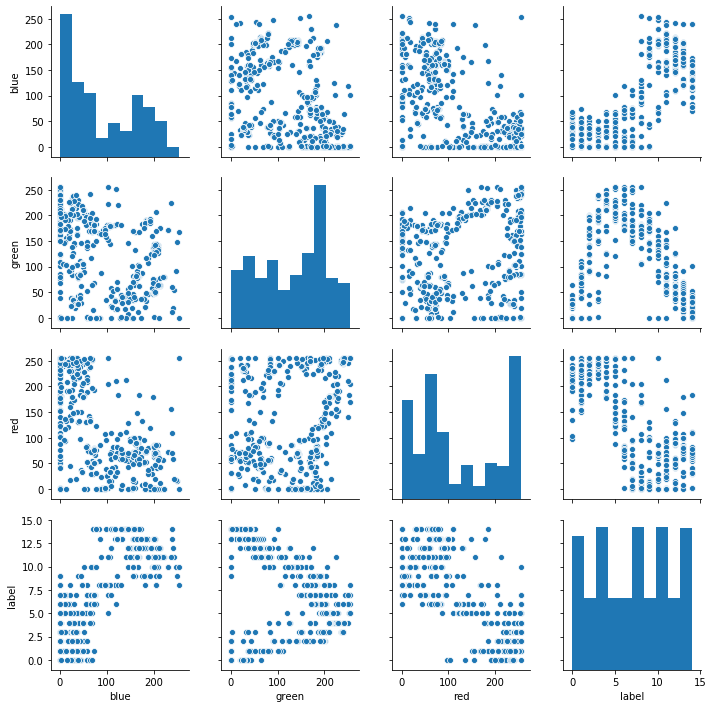

In [22]:
sns.pairplot(df)

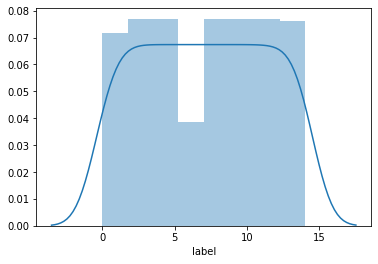

In [23]:
sns.distplot(df['label'])

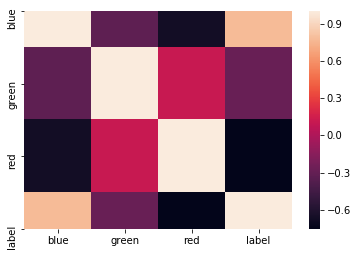

In [24]:
sns.heatmap(df.corr())
# No positive correlation can be observed bwetween 2 columns
# But interestingly we can see high negative correlation between red-blue 
# columns.

In [25]:
# Splitting into train and test test

In [26]:
df.columns

Index(['blue', 'green', 'red', 'label', 'Nature'], dtype='object')

In [27]:
X = df[['blue', 'green', 'red']]

In [28]:
y = df['label']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()

In [33]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lm.intercept_

7.972687221289089

In [35]:
lm.coef_

array([ 0.0258191 , -0.004937  , -0.02186446])

In [36]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])

In [37]:
cdf.head()

,Coefficients
blue,0.025819
green,-0.004937
red,-0.021864


Predictions

In [38]:
pred_LinearReg = lm.predict(X_test)

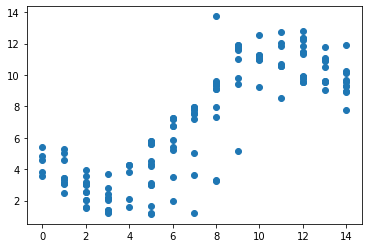

In [39]:
plt.scatter(y_test, pred_LinearReg)

Thus our predictions are quite far from the actual values

In [40]:
pred_LinearReg

array([ 7.95967966,  1.29771303,  9.58734594,  3.25775227,  2.54288997,
        7.29341622,  7.21498137,  9.89589627,  9.52105127,  3.57317101,
        9.85413207,  7.90804147,  1.21237168,  9.24602715,  1.32451449,
        9.40980186,  6.72713775,  9.41444543, 11.75410858,  9.45499989,
        1.16413582,  5.80210584,  3.53815727, 11.31743126,  7.18178538,
        9.1032795 ,  9.52105127, 10.10750878,  7.75917279, 13.7271411 ,
        5.80210584,  4.29028821,  2.0574497 , 11.29842162, 11.02416232,
        2.57712072,  9.52105127, 12.70965636,  1.17894681,  8.99975328,
       11.56163808,  2.8197243 ,  9.78768289,  3.1024656 ,  1.18768669,
        5.04987262,  1.41408878,  4.1778976 ,  7.92310555, 10.93174229,
        2.04245745,  1.58378055,  2.14546407, 11.87230587,  9.1032795 ,
        2.1687619 ,  5.42228196,  1.41408878,  3.65554971,  2.43506047,
        2.07750169,  7.53816396, 12.34753968, 12.5550748 ,  9.78768289,
        5.19257314, 11.76335518,  3.0626157 ,  1.94729302,  3.11

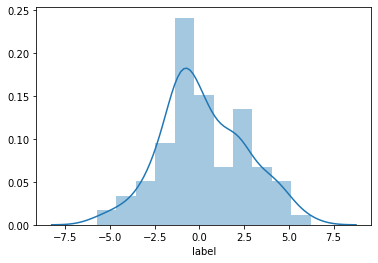

In [41]:
sns.distplot((y_test-pred_LinearReg), label="Distribution plot of residuals")

In [42]:
# It vaguely resembles normal dist plot but is still quite far

Evaluation Matrics

In [43]:
from sklearn import metrics

In [44]:
metrics.mean_absolute_error(y_test, pred_LinearReg)

1.8821920059984991

In [45]:
metrics.mean_squared_error(y_test, pred_LinearReg)

5.560619639059021

In [46]:
np.sqrt(metrics.mean_squared_error(y_test, pred_LinearReg))

2.358096613597293


Logistic Regression


In [47]:
# Used to predict discrete values only

In [48]:
df

,blue,green,red,label,Nature
0,36,27,231,0,Acidic
1,36,84,250,1,Acidic
2,37,164,255,2,Acidic
3,22,205,255,3,Acidic
4,38,223,221,4,Acidic
...,...,...,...,...,...
648,201,123,0,10,Basic
649,203,51,46,11,Basic
650,169,62,48,12,Basic
651,173,37,79,13,Basic


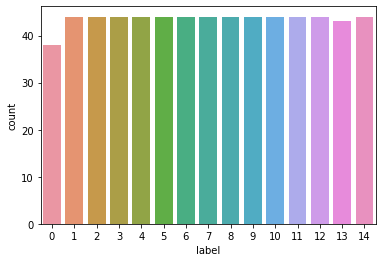

In [49]:
sns.countplot(x='label', data=df)

In [50]:
# Deal with Nature Column as a dummy variable

In [51]:
pd.get_dummies(df['Nature'])

,Acidic,Basic,Neutral
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
648,0,1,0
649,0,1,0
650,0,1,0
651,0,1,0


In [52]:
# Use OHE to work on categorical data(WIP)

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
enc = OneHotEncoder(handle_unknown='ignore')

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression()

In [57]:
logreg.fit(X_train, y_train)

/home/nitish/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/nitish/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
pred_LogReg = logreg.predict(X_test)

In [59]:
# Class Report

In [60]:
print(metrics.classification_report(y_test, pred_LogReg))

              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.90      0.72        10
           2       0.50      0.08      0.13        13
           3       0.30      0.25      0.27        12
           4       0.17      0.67      0.28         6
           5       0.62      0.36      0.45        14
           6       0.75      0.55      0.63        11
           7       0.69      0.75      0.72        12
           8       1.00      0.64      0.78        14
           9       0.67      0.67      0.67        12
          10       0.45      0.62      0.53         8
          11       0.39      0.88      0.54         8
          12       0.00      0.00      0.00        19
          13       0.62      0.80      0.70        10
          14       0.67      0.80      0.73        10

    accuracy                           0.52       164
   macro avg       0.52      0.58      0.51       164
weighted avg       0.52   

/home/nitish/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
print(metrics.confusion_matrix(y_test, pred_LogReg))

[[ 4  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  9  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  3  1  3  3  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  3  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  5  5  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  6  2  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  1  0  1  9  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  8  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  1  5  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  1 10  0  4  2]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  8  2]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  1  8]]


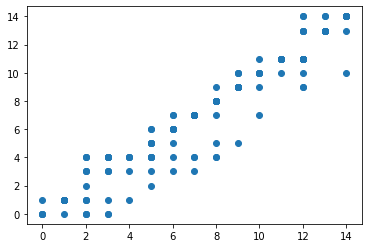

In [62]:
plt.scatter(y_test, pred_LogReg)

In [63]:
print(metrics.mean_absolute_error(y_test, pred_LinearReg))
print(metrics.mean_absolute_error(y_test, pred_LogReg))

1.8821920059984991
0.774390243902439


In [64]:
print(np.sqrt(metrics.mean_squared_error(y_test, pred_LinearReg)))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_LogReg)))

2.358096613597293
1.299624711308577


In [65]:
# We can see considerable improvements in using Logistic Regression
# over Linear Regression.
# Mean Error is now only 0.77 compared to 1.88.
# Mean Squared Error is also now only 1.29 compared to 2.35.

Text(0.5, 0, 'Actual - Predicted using Logistic Regression')

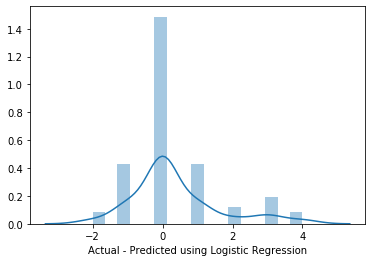

In [66]:
sns.distplot((y_test-pred_LogReg))
plt.xlabel('Actual - Predicted using Logistic Regression')
# Residual plot is also now closer to 0.

##K Nearest Neighbours

Step 1 - Scale the data as KNN depends on distance between the points

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

In [69]:
df.head()

,blue,green,red,label,Nature
0,36,27,231,0,Acidic
1,36,84,250,1,Acidic
2,37,164,255,2,Acidic
3,22,205,255,3,Acidic
4,38,223,221,4,Acidic


In [70]:
scaler.fit(df.drop(["label","Nature"], axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [71]:
scaled_feat = scaler.transform(df.drop(["label","Nature"], axis=1))

In [72]:
df_feat = pd.DataFrame(scaled_feat, columns=df.columns[:-2])

In [73]:
df_feat.head()

,blue,green,red
0,-0.711329,-1.423343,1.232726
1,-0.711329,-0.636393,1.444986
2,-0.697981,0.468098,1.500845
3,-0.898202,1.034149,1.500845
4,-0.684633,1.282660,1.121010


In [74]:
XKNN = df_feat
yKNN = df['label']

In [75]:
X_trainKNN, X_testKNN, y_trainKNN, y_testKNN = train_test_split(X, y, test_size=0.25, random_state=10)

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)

In [78]:
knn.fit(X_trainKNN, y_trainKNN)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [79]:
pred_KNN = knn.predict(X_testKNN)

In [80]:
print(metrics.classification_report(y_testKNN, pred_KNN))

              precision    recall  f1-score   support

           0       0.25      0.40      0.31         5
           1       0.47      0.80      0.59        10
           2       0.75      0.46      0.57        13
           3       0.75      0.75      0.75        12
           4       0.21      0.50      0.30         6
           5       0.89      0.57      0.70        14
           6       0.80      0.73      0.76        11
           7       0.90      0.75      0.82        12
           8       0.85      0.79      0.81        14
           9       1.00      0.83      0.91        12
          10       0.70      0.88      0.78         8
          11       0.50      0.62      0.56         8
          12       0.85      0.58      0.69        19
          13       0.69      0.90      0.78        10
          14       0.86      0.60      0.71        10

    accuracy                           0.68       164
   macro avg       0.70      0.68      0.67       164
weighted avg       0.75   

In [81]:
print(metrics.confusion_matrix(y_testKNN, pred_KNN))

[[ 2  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  8  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  4  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  9  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  1  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  4  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  0  8  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  1  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  1  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 10  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  5  2  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  2  4 11  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  0  3  6]]


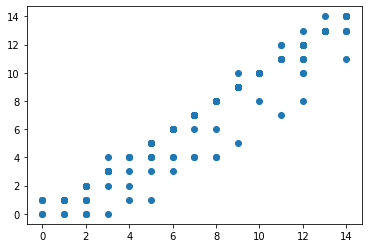

In [82]:
plt.scatter(y_testKNN, pred_KNN)

In [83]:
print(metrics.mean_absolute_error(y_testKNN, pred_KNN))

0.5670731707317073


In [84]:
print(np.sqrt(metrics.mean_squared_error(y_testKNN, pred_KNN)))

1.1660858019721259


Text(0.5, 0, 'Actual - Predicted using KNN')

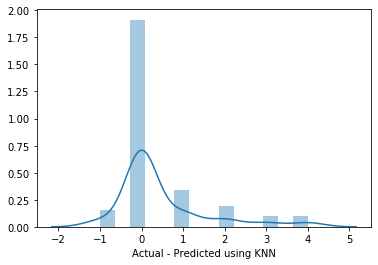

In [85]:
sns.distplot((y_testKNN-pred_KNN))
plt.xlabel('Actual - Predicted using KNN')

In [86]:
mini = 0;
min_val = 2;

for i in range(1,489):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_trainKNN, y_trainKNN)
  pred_i = knn.predict(X_testKNN)
  if(min_val > metrics.mean_absolute_error(y_testKNN, pred_i)):
    min_val = metrics.mean_absolute_error(y_testKNN, pred_i)
    mini = i
print(min_val)
print(mini)

0.5670731707317073
3


In [87]:
mini

3

#### K=1 has the highest accuracy

## Decision Trees Model

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtree = DecisionTreeClassifier()

In [90]:
dtree.fit(X_trainKNN, y_trainKNN)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [91]:
pred_dtree = dtree.predict(X_testKNN)

In [92]:
print(metrics.classification_report(y_testKNN, pred_dtree))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.44      0.70      0.54        10
           2       0.56      0.38      0.45        13
           3       0.64      0.58      0.61        12
           4       0.44      0.67      0.53         6
           5       0.78      0.50      0.61        14
           6       0.69      0.82      0.75        11
           7       0.82      0.75      0.78        12
           8       0.85      0.79      0.81        14
           9       0.82      0.75      0.78        12
          10       0.75      0.75      0.75         8
          11       0.55      0.75      0.63         8
          12       0.80      0.63      0.71        19
          13       0.57      0.80      0.67        10
          14       0.86      0.60      0.71        10

    accuracy                           0.66       164
   macro avg       0.67      0.67      0.66       164
weighted avg       0.69   

In [93]:
print(metrics.confusion_matrix(y_testKNN, pred_dtree))

[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  7  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 1  5  5  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  2  7  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  2  7  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  1  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0 11  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  9  1  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  6  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  6  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  2 12  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  8  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  2  6]]


In [94]:
print(metrics.mean_absolute_error(y_testKNN, pred_dtree))

0.5426829268292683


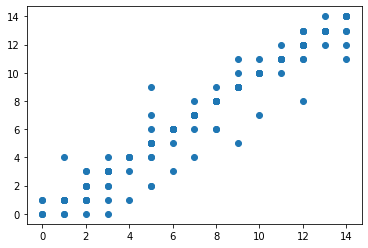

In [95]:
plt.scatter(y_testKNN, pred_dtree)

In [96]:
print(np.sqrt(metrics.mean_squared_error(y_testKNN, pred_dtree)))

1.0848176198295651


## Random Forest Classification

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(n_estimators=30)

In [99]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
pred_rfc = rfc.predict(X_test)

In [101]:
print(metrics.classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50         5
           1       0.50      0.80      0.62        10
           2       0.60      0.46      0.52        13
           3       0.78      0.58      0.67        12
           4       0.56      0.83      0.67         6
           5       0.88      0.50      0.64        14
           6       0.69      0.82      0.75        11
           7       0.75      0.75      0.75        12
           8       0.75      0.86      0.80        14
           9       0.91      0.83      0.87        12
          10       0.67      0.75      0.71         8
          11       0.75      0.75      0.75         8
          12       0.87      0.68      0.76        19
          13       0.75      0.90      0.82        10
          14       0.89      0.80      0.84        10

    accuracy                           0.72       164
   macro avg       0.72      0.73      0.71       164
weighted avg       0.74   

In [102]:
print(metrics.confusion_matrix(y_test, pred_rfc))

[[ 3  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  8  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  4  6  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  5  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  1  7  1  2  0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  9  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 10  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  6  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  6  1  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  2  0 13  3  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  0  8]]


In [103]:
print(metrics.mean_absolute_error(y_testKNN, pred_rfc))
print(np.sqrt(metrics.mean_squared_error(y_testKNN, pred_rfc)))

0.5121951219512195
1.0932163332202425


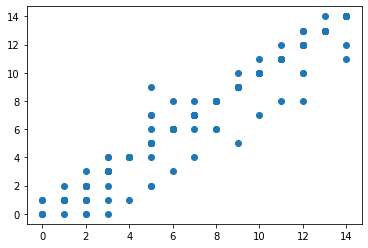

In [104]:
plt.scatter(y_testKNN, pred_rfc)

In [105]:
print(metrics.accuracy_score(y_test, pred_rfc))
print(metrics.accuracy_score(y_test, pred_dtree))
print(metrics.accuracy_score(y_test, pred_KNN))
print(metrics.accuracy_score(y_test, pred_LogReg))

0.7195121951219512
0.6646341463414634
0.6829268292682927
0.524390243902439


## Support Vector Machine

In [106]:
from sklearn.svm import SVC

In [128]:
svm_model = SVC(C=100,gamma=0.01,kernel='linear')

In [129]:
svm_model.fit(X_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [109]:
pred_svm = svm_model.predict(X_test)

In [130]:
print(metrics.confusion_matrix(y_test, pred_svm))

[[ 1  0  0  0  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  5  5  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  6  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  6  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  9  0  0  0  0  0  0  0]
 [ 0  0  0  0  5  0  0  0  9  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0  0  9  1  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  5  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  8  1  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  6  0]
 [ 0  0  0  0  7  0  0  0  0  0  0  0  0  0  3]]


In [131]:
print(metrics.classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.80      0.40      0.53        10
           2       0.80      0.31      0.44        13
           3       1.00      0.42      0.59        12
           4       0.08      1.00      0.14         6
           5       0.86      0.43      0.57        14
           6       0.83      0.45      0.59        11
           7       0.90      0.75      0.82        12
           8       1.00      0.64      0.78        14
           9       1.00      0.75      0.86        12
          10       0.80      0.50      0.62         8
          11       1.00      0.62      0.77         8
          12       1.00      0.42      0.59        19
          13       0.86      0.60      0.71        10
          14       1.00      0.30      0.46        10

    accuracy                           0.51       164
   macro avg       0.86      0.52      0.59       164
weighted avg       0.89   

In [134]:
print(metrics.mean_absolute_error(y_test, pred_svm))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_svm)))
print(metrics.accuracy_score(y_test,pred_svm))

2.1463414634146343
3.749796742458996
0.5121951219512195


In [117]:
from sklearn.model_selection import GridSearchCV

In [118]:
param_grid = {'C': [100,1000,10000],'gamma': [0.01,0.001,0.0001,0.00001],'kernel':['sigmoid','rbf']}

In [119]:
grid = GridSearchCV(SVC(),param_grid,verbose=5)

In [120]:
grid.fit(X_train, y_train)

/home/nitish/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.078, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.080, total=   0.0s
[CV] C=100, gamma=0.01, kernel=sigmoid ...............................
[CV] ... C=100, gamma=0.01, kernel=sigmoid, score=0.075, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.671, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.669, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.704, total=   0.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] .. C=100, g

[CV] ... C=10000, gamma=0.0001, kernel=rbf, score=0.723, total=   0.0s
[CV] C=10000, gamma=1e-05, kernel=sigmoid ............................
[CV]  C=10000, gamma=1e-05, kernel=sigmoid, score=0.581, total=   0.0s
[CV] C=10000, gamma=1e-05, kernel=sigmoid ............................
[CV]  C=10000, gamma=1e-05, kernel=sigmoid, score=0.521, total=   0.0s
[CV] C=10000, gamma=1e-05, kernel=sigmoid ............................
[CV]  C=10000, gamma=1e-05, kernel=sigmoid, score=0.535, total=   0.0s
[CV] C=10000, gamma=1e-05, kernel=rbf ................................
[CV] .... C=10000, gamma=1e-05, kernel=rbf, score=0.689, total=   0.0s
[CV] C=10000, gamma=1e-05, kernel=rbf ................................
[CV] .... C=10000, gamma=1e-05, kernel=rbf, score=0.699, total=   0.0s
[CV] C=10000, gamma=1e-05, kernel=rbf ................................
[CV] .... C=10000, gamma=1e-05, kernel=rbf, score=0.667, total=   0.0s


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    1.4s finished
/home/nitish/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 1000, 10000],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['sigmoid', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [121]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [122]:
grid.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
pred_grid = grid.predict(X_test)

In [124]:
print(metrics.confusion_matrix(y_test, pred_grid))

[[ 2  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  7  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  6  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  1  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  2  7  0  2  0  1  0  0  0  0  0]
 [ 0  0  1  0  0  0  9  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  9  1  0  0  0  0  0  0]
 [ 0  0  0  0  1  1  0  0 11  1  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0 10  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  6  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  0  5  2  0  0]
 [ 0  0  0  0  0  0  0  0  1  0  1  3 12  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  9  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  7]]


In [125]:
print(metrics.classification_report(y_test, pred_grid))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.37      0.70      0.48        10
           2       0.55      0.46      0.50        13
           3       0.78      0.58      0.67        12
           4       0.40      0.67      0.50         6
           5       0.78      0.50      0.61        14
           6       0.90      0.82      0.86        11
           7       0.82      0.75      0.78        12
           8       0.69      0.79      0.73        14
           9       0.83      0.83      0.83        12
          10       0.75      0.75      0.75         8
          11       0.56      0.62      0.59         8
          12       0.86      0.63      0.73        19
          13       0.64      0.90      0.75        10
          14       0.88      0.70      0.78        10

    accuracy                           0.68       164
   macro avg       0.69      0.67      0.67       164
weighted avg       0.71   

In [126]:
print(metrics.mean_absolute_error(y_test, pred_grid))
print(np.sqrt(metrics.mean_squared_error(y_test, pred_grid)))

0.5426829268292683
1.1288889422358779


In [133]:
print(metrics.accuracy_score(y_test,pred_grid))

0.676829268292683
